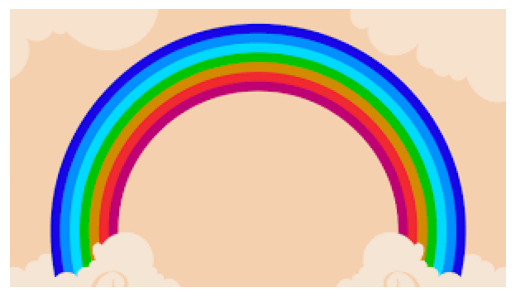

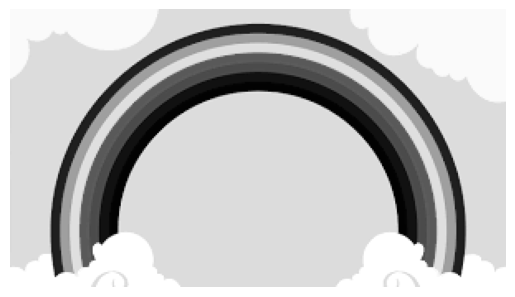

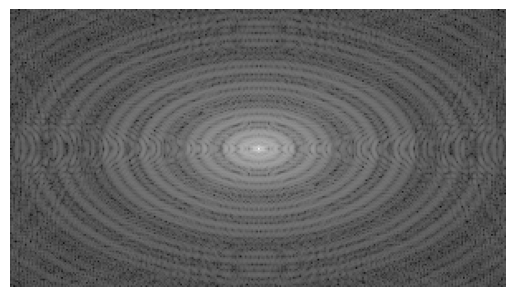

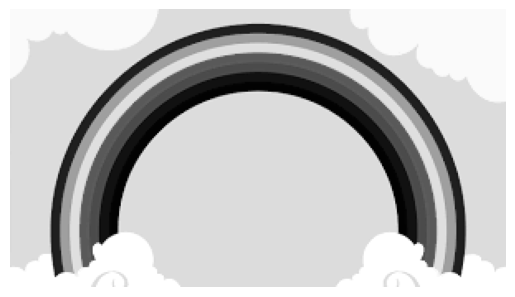

In [16]:
#@title Transformada de Fourier
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Carrega a imagem as imagem
img = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 4/cores.png', 1)

plt.imshow(img)
plt.axis('off')
plt.show()

# Converte para tons de cinza
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

#Transformada de Fourier
matfourier = np.fft.fft2(gray)
fshift = np.fft.fftshift(matfourier)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.axis('off')
plt.show()

#Transformada Inversa de Fourier
f_ishift = np.fft.ifftshift(fshift)
img_resultante = np.fft.ifft2(f_ishift)
img_resultante = np.abs(img_resultante)

plt.imshow(img_resultante, cmap = 'gray')
plt.axis('off')
plt.show()

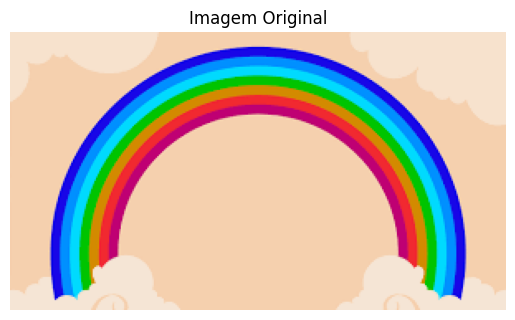

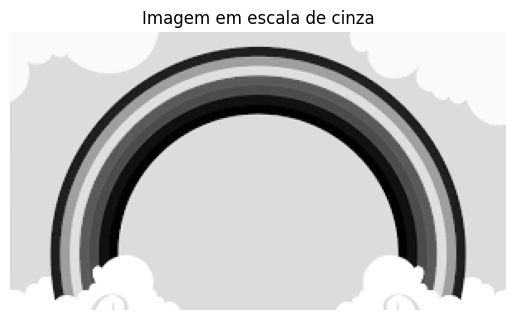

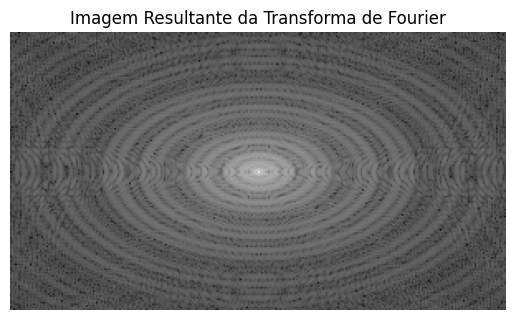

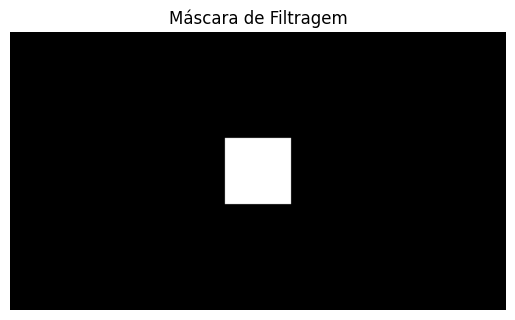

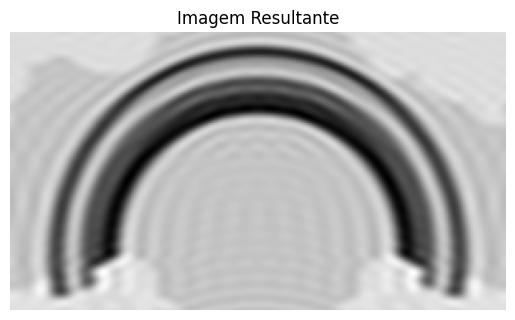

In [21]:
#@title Máscara de Filtragem
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Carrega a imagem as imagem
img = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 4/cores.png', 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis('off')
plt.show()

# Converte para tons de cinza
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Imagem em escala de cinza")
plt.axis('off')
plt.show()

#Transformada de Fourier
matfourier = np.fft.fft2(gray)
fshift = np.fft.fftshift(matfourier)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title("Imagem Resultante da Transforma de Fourier")
plt.axis('off')
plt.show()

#Criando a Máscara de Filtragem
linha , coluna = matfourier.shape
mask = np.zeros((linha , coluna), dtype='uint8' )
lC = int(linha/2)
cC = int(coluna/2)
d = 20 #Centralizando o espectro de Fourier
mask[lC-d:lC+d, cC-d:cC+d] =1

#Exibe a Máscara criada
plt.imshow(mask, cmap = 'gray')
plt.title("Máscara de Filtragem")
plt.axis('off')
plt.show()

#Filtragem na Frequência
filtro = fshift*mask
fshift = np.fft.fftshift(filtro)

#Transformada Inversa de Fourier
img_resultante = np.fft.ifft2(fshift)
img_resultante = np.real(img_resultante)

#Exibe a imagem resultante da Filtragem na frequência
plt.imshow(img_resultante, cmap = 'gray')
plt.title("Imagem Resultante")
plt.axis('off')
plt.show()